In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
import numpy as np
from sklearn import preprocessing
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import MinMaxScaler

from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Processing customer df before merging

In [ ]:
customer_df = pd.read_csv('/content/drive/MyDrive/BT4012/raw dataset/Customer_DF (1).csv').drop('Unnamed: 0', axis =1 )
customer_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True


## Extracting billing region from billing address

In [ ]:
def process_billing_addr(addr):
  final_list = addr.split("\n")[1].split(" ")
  for i in final_list:
    if len(i) == 2:
      return i
  return None

customer_df["customerBillingAddressRegion"] = customer_df["customerBillingAddress"].apply(process_billing_addr)
customer_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,CA
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,NM
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,PR
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,FM
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,TN
...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,OR
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,AZ
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,OK
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,IL


### categorise state code into regions
- https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971
- https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions

In [ ]:
us_regions = pd.read_csv("/content/drive/MyDrive/BT4012/raw dataset/US States and Regions.csv")
customer_df = pd.merge(customer_df, us_regions, left_on = "customerBillingAddressRegion", right_on = "State", how="left")
customer_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,Region,State
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False,CA,West,CA
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True,NM,West,NM
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False,PR,NaN,NaN
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False,FM,NaN,NaN
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True,TN,South,TN
...,...,...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",3,3,1,True,OR,West,OR
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",6,5,3,True,AZ,West,AZ
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,OK,South,OK
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,"16953 Jennifer Springs\nKathybury, IL 02095-3215",8,6,6,True,IL,Midwest,IL


In [ ]:
customer_df.drop(["customerBillingAddress", "customerBillingAddressRegion", "State"], axis = 1, inplace= True)

In [ ]:
customer_df.rename(columns = {"Region": "customerBillingAddressRegion"}, inplace = True)

In [ ]:
customer_df.head(5)

,customerEmail,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False,West
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True,West
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,5,3,2,False,NaN
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,3,3,1,False,NaN
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,7,7,6,True,South


### Nan billing region are set to Others as they are not classified into any regions (based on wiki)

In [ ]:
customer_df["customerBillingAddressRegion"] = customer_df["customerBillingAddressRegion"].fillna("Others")
customer_df.head(5)

,customerEmail,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False,West
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True,West
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,5,3,2,False,Others
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,3,3,1,False,Others
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,7,7,6,True,South


## Extracting country of origin from IP Address

In [ ]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests

def get_location(ip_address):
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name")
    }
    return location_data

In [ ]:
customer_df["ip_location_data"] = customer_df["customerIPAddress"].apply(get_location)
customer_df["ip_country"] = customer_df["ip_location_data"].apply(lambda x: x["country"])
customer_df["ip_country"] = customer_df["ip_country"].fillna("Unknown")

In [ ]:
customer_df = customer_df.drop("ip_location_data", axis=1)
customer_df

,customerEmail,customerPhone,customerDevice,customerIPAddress,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,2,2,1,False,West,China
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,3,3,7,True,West,Japan
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,5,3,2,False,Others,Switzerland
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,3,3,1,False,Others,Switzerland
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,7,7,6,True,South,Morocco
...,...,...,...,...,...,...,...,...,...,...
163,mitchellvickie@brewer-jones.com,313-124-3836x3528,ecu7ezz0ue67v3fce1o3,181.90.104.120,3,3,1,True,West,Unknown
164,sbrown@hughes.biz,(250)632-6631x02499,xgv918sclaz40qlp2fee,16.166.2.0,6,5,3,True,West,Unknown
165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,4,4,2,True,South,Switzerland
166,ethompson@jackson-sanders.com,962.300.2250,navessqcnmc9csfjn5cj,203.246.172.244,8,6,6,True,Midwest,Unknown


## Drop columns: customerPhone, customerDevice, customerBillingAddress

In [ ]:
customer_df = customer_df.drop(["customerPhone", "customerDevice", "customerIPAddress"], axis = 1)
customer_df.head(5)

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country
0,josephhoward@yahoo.com,2,2,1,False,West,China
1,evansjeffery@yahoo.com,3,3,7,True,West,Japan
2,andersonwilliam@yahoo.com,5,3,2,False,Others,Switzerland
3,rubenjuarez@yahoo.com,3,3,1,False,Others,Switzerland
4,uchen@malone.com,7,7,6,True,South,Morocco


## Handle duplicated email address
- set Billing Address Region, ip_country to multiple

In [ ]:
customer_df[customer_df.duplicated("customerEmail")]

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country
40,johnlowery@gmail.com,0,0,1,True,Midwest,Switzerland
45,johnlowery@gmail.com,3,2,1,True,Midwest,Unknown
65,johnlowery@gmail.com,7,5,1,True,West,Switzerland
79,johnlowery@gmail.com,2,2,1,True,West,Australia
133,johnlowery@gmail.com,0,0,0,True,Midwest,Unknown
155,johnlowery@gmail.com,6,5,3,True,Midwest,Unknown
165,johnlowery@gmail.com,4,4,2,True,South,Switzerland


In [ ]:
customer_df.loc[ customer_df["customerEmail"] == "johnlowery@gmail.com"	, ["customerBillingAddressRegion", "ip_city", "ip_region", "ip_country"]] = "Multiple"

In [ ]:
customer_df[customer_df["customerEmail"] == "johnlowery@gmail.com"]

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country,ip_city,ip_region
7,johnlowery@gmail.com,6,5,2,True,Multiple,Multiple,Multiple,Multiple
40,johnlowery@gmail.com,0,0,1,True,Multiple,Multiple,Multiple,Multiple
45,johnlowery@gmail.com,3,2,1,True,Multiple,Multiple,Multiple,Multiple
65,johnlowery@gmail.com,7,5,1,True,Multiple,Multiple,Multiple,Multiple
79,johnlowery@gmail.com,2,2,1,True,Multiple,Multiple,Multiple,Multiple
133,johnlowery@gmail.com,0,0,0,True,Multiple,Multiple,Multiple,Multiple
155,johnlowery@gmail.com,6,5,3,True,Multiple,Multiple,Multiple,Multiple
165,johnlowery@gmail.com,4,4,2,True,Multiple,Multiple,Multiple,Multiple


## Adding new column: No_Accounts
- Number of account for a given email address

In [ ]:
customer_df["No_Accounts"] = 1

## Aggregate the df by email address

In [ ]:
customer_df_agg = customer_df.groupby("customerEmail").agg({"No_Transactions": "sum", "No_Orders": "sum", "No_Payments": "sum", 
                                          "Fraud": "max", "customerBillingAddressRegion": "max", "ip_country": "max", "No_Accounts": "sum"})

customer_df_agg = customer_df_agg.reset_index()
customer_df_agg

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country,No_Accounts
0,1yf0@jedyz63t,10,5,4,True,South,Unknown,1
1,3fooiar@6eph,0,0,1,True,West,Argentina,1
2,9es7t@u6n7x,2,1,1,True,Midwest,United States,1
3,abigail08@yahoo.com,5,3,2,False,Northeast,United States,1
4,alec27@bell.com,6,4,2,False,Midwest,United States,1
...,...,...,...,...,...,...,...,...
156,ybrown@gmail.com,5,4,3,False,Midwest,Unknown,1
157,ypruitt@hotmail.com,4,4,3,False,Others,Unknown,1
158,zbennett@frazier.com,0,0,0,False,South,Switzerland,1
159,zgraham@yahoo.com,5,4,3,False,Midwest,Unknown,1


In [ ]:
customer_df_agg[customer_df_agg["customerEmail"] == "johnlowery@gmail.com"]

,customerEmail,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country,No_Accounts
68,johnlowery@gmail.com,28,23,11,True,Multiple,Multiple,8


In [ ]:
customer_df_agg.to_csv("/content/drive/MyDrive/BT4012/raw dataset/final_cust_details.csv")

# Merging cust transaction details and customer df

In [ ]:
cust_transaction_details = pd.read_csv("/content/drive/MyDrive/BT4012/raw dataset/cust_transaction_details (1).csv").drop('Unnamed: 0', axis = 1)

In [ ]:
cust_transaction_details

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...
618,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
619,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
620,dawn05@tucker-brown.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
621,dawn05@tucker-brown.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


In [ ]:
full_df = pd.merge(cust_transaction_details, customer_df_agg, on = 'customerEmail')
full_df.head(5)

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud,customerBillingAddressRegion,ip_country,No_Accounts
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,2,2,1,False,West,China,1
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,2,2,1,False,West,China,1
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,3,3,7,True,West,Japan,1
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,3,3,7,True,West,Japan,1
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,3,3,7,True,West,Japan,1


In [ ]:
full_df.shape

(623, 17)

In [ ]:
# adjusting: fraud column at the end of the dataframe
cols = list(full_df.columns)
cols.remove('Fraud')
cols.append('Fraud')
full_df = full_df[cols]
full_df.head(5)

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,customerBillingAddressRegion,ip_country,No_Accounts,Fraud
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,2,2,1,West,China,1,False
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,2,2,1,West,China,1,False
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,3,3,7,West,Japan,1,True
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,3,3,7,West,Japan,1,True
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,3,3,7,West,Japan,1,True


## Dropping columns: "paymentMethodId", "transactionId", "orderId, customerEmail"

In [ ]:
#paymentMethodId is derived from paymentMethodProvider,  paymentMethodType -> paymentMethodId can be removed
# transactionid is unique across all transaction -> removed
full_df = full_df.drop(["paymentMethodId", "transactionId", "orderId", "customerEmail"], axis =1)
full_df.head(5)

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,customerBillingAddressRegion,ip_country,No_Accounts,Fraud
0,1,card,JCB 16 digit,18,0,pending,2,2,1,West,China,1,False
1,1,card,JCB 16 digit,26,0,fulfilled,2,2,1,West,China,1,False
2,0,bitcoin,American Express,45,0,fulfilled,3,3,7,West,Japan,1,True
3,0,bitcoin,American Express,23,0,fulfilled,3,3,7,West,Japan,1,True
4,1,bitcoin,VISA 16 digit,43,1,fulfilled,3,3,7,West,Japan,1,True


## Drop duplicates

In [ ]:
full_df = full_df.drop_duplicates()

# Full DF EDA

In [ ]:
full_df.shape

(587, 13)

In [ ]:
full_df.head(5)

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,customerBillingAddressRegion,ip_country,No_Accounts,Fraud
0,1,card,JCB 16 digit,18,0,pending,2,2,1,West,China,1,False
1,1,card,JCB 16 digit,26,0,fulfilled,2,2,1,West,China,1,False
2,0,bitcoin,American Express,45,0,fulfilled,3,3,7,West,Japan,1,True
3,0,bitcoin,American Express,23,0,fulfilled,3,3,7,West,Japan,1,True
4,1,bitcoin,VISA 16 digit,43,1,fulfilled,3,3,7,West,Japan,1,True


In [ ]:
full_df.describe()

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,No_Accounts
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,0.132879,34.984668,0.231687,6.701874,5.088586,2.884157,1.333901
std,0.339733,20.632609,0.422270,5.389097,4.331682,2.726473,1.493190
min,0.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,21.000000,0.000000,4.000000,3.000000,1.000000,1.000000
50%,0.000000,34.000000,0.000000,5.000000,4.000000,2.000000,1.000000
75%,0.000000,46.000000,0.000000,7.000000,5.000000,3.000000,1.000000
max,1.000000,353.000000,1.000000,28.000000,23.000000,15.000000,8.000000


In [ ]:
full_df.dtypes

paymentMethodRegistrationFailure     int64
paymentMethodType                   object
paymentMethodProvider               object
transactionAmount                    int64
transactionFailed                    int64
orderState                          object
No_Transactions                      int64
No_Orders                            int64
No_Payments                          int64
customerBillingAddressRegion        object
ip_country                          object
No_Accounts                          int64
Fraud                                 bool
dtype: object

## Histogram Distribution

### No transactions
- skew: 2.9252649152691186
- kurtosis: 8.968875550579696

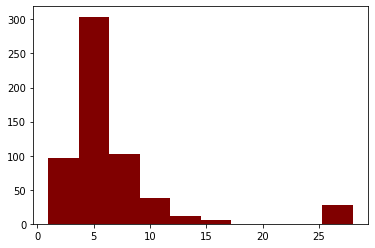

In [ ]:
plt.hist(full_df['No_Transactions'], color ='maroon')
plt.show()

In [ ]:
print(full_df['No_Transactions'].skew())
print(full_df['No_Transactions'].kurtosis())

2.9252649152691186
8.968875550579696


### No orders
- skew: 3.3148058762566017
- kurtosis: 11.186508442154054

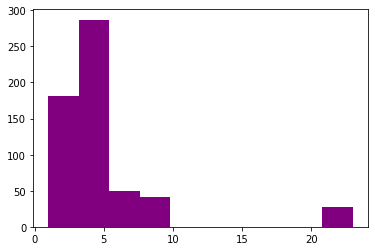

In [ ]:
plt.hist(full_df['No_Orders'], color ='purple')
plt.show()

In [ ]:
print(full_df['No_Orders'].skew())
print(full_df['No_Orders'].kurtosis())

3.3148058762566017
11.186508442154054


### No payment
- skew: 2.3490950579452883
- kurtosis: 5.570524212669014

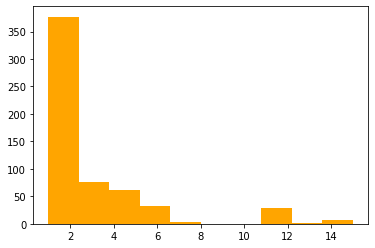

In [ ]:
plt.hist(full_df['No_Payments'], color ='orange')
plt.show()

In [ ]:
print(full_df['No_Payments'].skew())
print(full_df['No_Payments'].kurtosis())

2.3490950579452883
5.570524212669014


### Transaction amount
- skew: 6.400660058150552
- kurtosis: 95.17874389161865

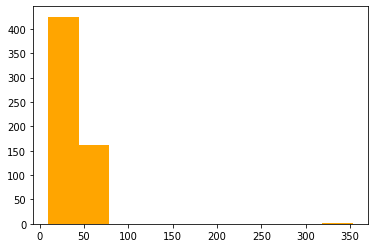

In [ ]:
plt.hist(full_df['transactionAmount'], color ='orange')
plt.show()

In [ ]:
print(full_df['transactionAmount'].skew())
print(full_df['transactionAmount'].kurtosis())

6.400660058150552
95.17874389161865


### No Accounts
- skew: 4.255215840443447
- kurtosis: 16.16191669604196

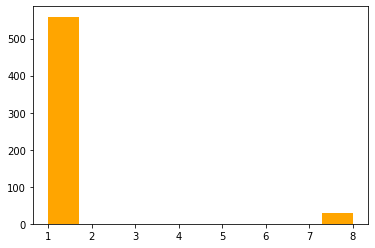

In [ ]:
plt.hist(full_df['No_Accounts'], color ='orange')
plt.show()

In [ ]:
print(full_df['No_Accounts'].skew())
print(full_df['No_Accounts'].kurtosis())

4.255215840443447
16.16191669604196


## Box Plot

### No Transactions

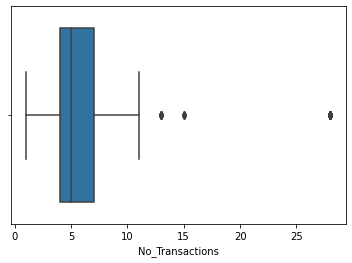

In [ ]:
sns.boxplot(x=full_df['No_Transactions'])

### No Orders

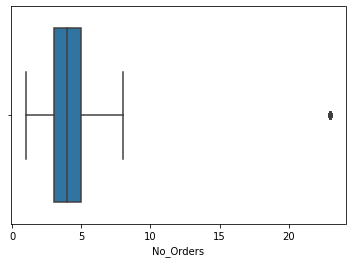

In [ ]:
sns.boxplot(x=full_df['No_Orders'])

### No Payments

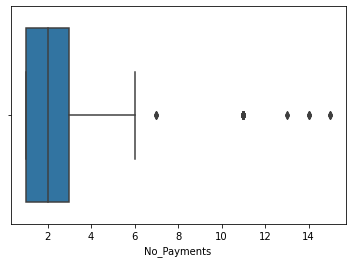

In [ ]:
sns.boxplot(x=full_df['No_Payments'])

### Transaction amount

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


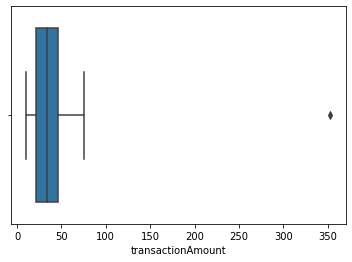

In [ ]:
sns.boxplot(full_df['transactionAmount'])

### No Accounts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


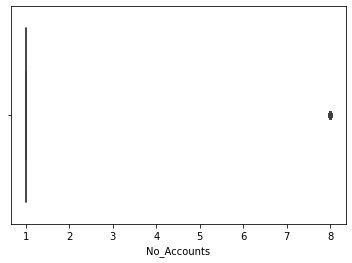

In [ ]:
sns.boxplot(full_df['No_Accounts'])

## Piechart

### orderstate

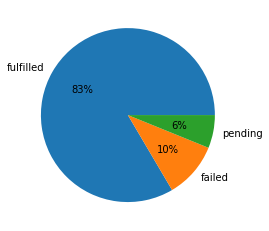

In [ ]:
y = full_df["orderState"].value_counts().reset_index()
y
plt.pie(y["orderState"], labels = y["index"], autopct='%.0f%%')
plt.show()

### payment method provider

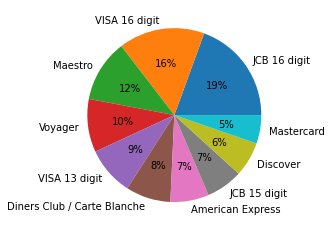

In [ ]:
y = full_df["paymentMethodProvider"].value_counts().reset_index()
y
plt.pie(y["paymentMethodProvider"], labels = y["index"], autopct='%.0f%%')
plt.show()

### payment method type

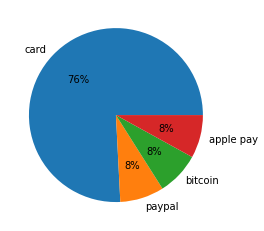

In [ ]:
y = full_df["paymentMethodType"].value_counts().reset_index()
y
plt.pie(y["paymentMethodType"], labels = y["index"], autopct='%.0f%%')
plt.show()

### payment registration failure

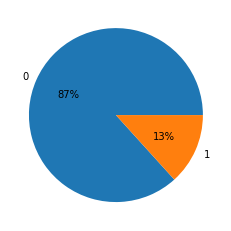

In [ ]:
y = full_df["paymentMethodRegistrationFailure"].value_counts().reset_index()
y
plt.pie(y["paymentMethodRegistrationFailure"], labels = y["index"], autopct='%.0f%%')
plt.show()

### transaction failed

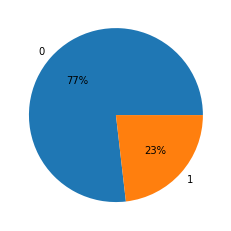

In [ ]:
y = full_df["transactionFailed"].value_counts().reset_index()
y
plt.pie(y["transactionFailed"], labels = y["index"], autopct='%.0f%%')
plt.show()

## Relationship

### encode full df to look at relationship

In [ ]:
full_df_encode = full_df.copy()
full_df_encode = full_df_encode.join(pd.get_dummies(full_df_encode["paymentMethodType"], prefix = 'paymentMethodType'))
full_df_encode = full_df_encode.join(pd.get_dummies(full_df_encode["paymentMethodProvider"], prefix = 'paymentMethodProvider'))
full_df_encode = full_df_encode.join(pd.get_dummies(full_df_encode["orderState"], prefix = 'orderState'))
full_df_encode = full_df_encode.join(pd.get_dummies(full_df_encode["customerBillingAddressRegion"], prefix = 'billingRegion'))
full_df_encode = full_df_encode.join(pd.get_dummies(full_df_encode["ip_country"], prefix = 'ipCountry'))
le = preprocessing.LabelEncoder()
full_df_encode['Fraud'] = le.fit_transform(full_df_encode['Fraud'])
print(f'fraud: {le.classes_}')

fraud: [False  True]


In [ ]:
full_df_encode.drop(['paymentMethodType',
       'paymentMethodProvider','orderState','customerBillingAddressRegion', 'ip_country'], axis = 1, inplace = True)

In [ ]:
full_df_encode.head(5)

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,No_Accounts,Fraud,paymentMethodType_apple pay,paymentMethodType_bitcoin,...,ipCountry_Morocco,ipCountry_Multiple,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown
0,1,18,0,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,26,0,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,45,0,3,3,7,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,23,0,3,3,7,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,43,1,3,3,7,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
numerical_df = full_df_encode[['transactionAmount','No_Transactions', 'No_Orders', 'No_Payments', 'No_Accounts']]
binary_df = full_df_encode[['paymentMethodRegistrationFailure', 'transactionFailed', 'Fraud']]
categorical_df = full_df_encode[["paymentMethodRegistrationFailure", "transactionFailed"]].join(full_df_encode.iloc[:, 7:])

### Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

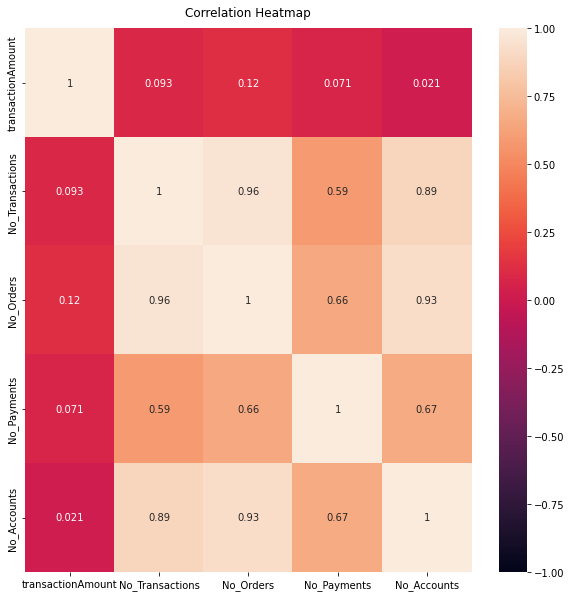

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, ax = ax).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### Point Biserial Correlation
To look at the relationship between binary and continuous data


In [ ]:
biserialcorr_df = pd.DataFrame(columns=numerical_df.columns, index=binary_df.columns)


for i in binary_df.columns:
  lst = []
  for z in numerical_df.columns:
    lst.append(pointbiserialr(binary_df[i], numerical_df[z])[0])
  biserialcorr_df.loc[i] = lst

biserialcorr_df

,transactionAmount,No_Transactions,No_Orders,No_Payments,No_Accounts
paymentMethodRegistrationFailure,0.028531,-0.036114,-0.048598,-0.119684,-0.087612
transactionFailed,0.033901,0.0604,-0.008441,-0.028526,-0.00923
Fraud,0.323019,0.344555,0.395272,0.430107,0.261666


### Cramer V Corr
To look at the relationship between categorical data

0 to 1 (1 = perfect association)

In [ ]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in categorical_df.columns:
  col = []
  for var2 in categorical_df.columns :
    cramers =cramers_V(categorical_df[var1], categorical_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cramer_df = pd.DataFrame(cramers_results, columns = categorical_df.columns, index =categorical_df.columns)

cramer_df

,paymentMethodRegistrationFailure,transactionFailed,Fraud,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,...,ipCountry_Morocco,ipCountry_Multiple,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown
paymentMethodRegistrationFailure,0.99,0.00,0.00,0.00,0.05,0.00,0.01,0.00,0.01,0.00,...,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00
transactionFailed,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fraud,0.00,0.00,0.99,0.00,0.00,0.00,0.02,0.00,0.00,0.00,...,0.01,0.06,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.00
paymentMethodType_apple pay,0.00,0.00,0.00,0.98,0.01,0.27,0.01,0.05,0.00,0.00,...,0.01,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00
paymentMethodType_bitcoin,0.05,0.00,0.00,0.01,0.98,0.27,0.01,0.00,0.00,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01
paymentMethodType_card,0.00,0.00,0.00,0.27,0.27,0.99,0.27,0.00,0.00,0.00,...,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
paymentMethodType_paypal,0.01,0.00,0.02,0.01,0.01,0.27,0.98,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
paymentMethodProvider_American Express,0.00,0.00,0.00,0.05,0.00,0.00,0.01,0.97,0.01,0.00,...,0.00,0.00,0.01,0.00,0.00,0.01,0.03,0.00,0.00,0.00
paymentMethodProvider_Diners Club / Carte Blanche,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.98,0.00,...,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.02,0.00
paymentMethodProvider_Discover,0.00,0.01,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.97,...,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.01


Text(0.5, 1.0, 'Correlation Heatmap')

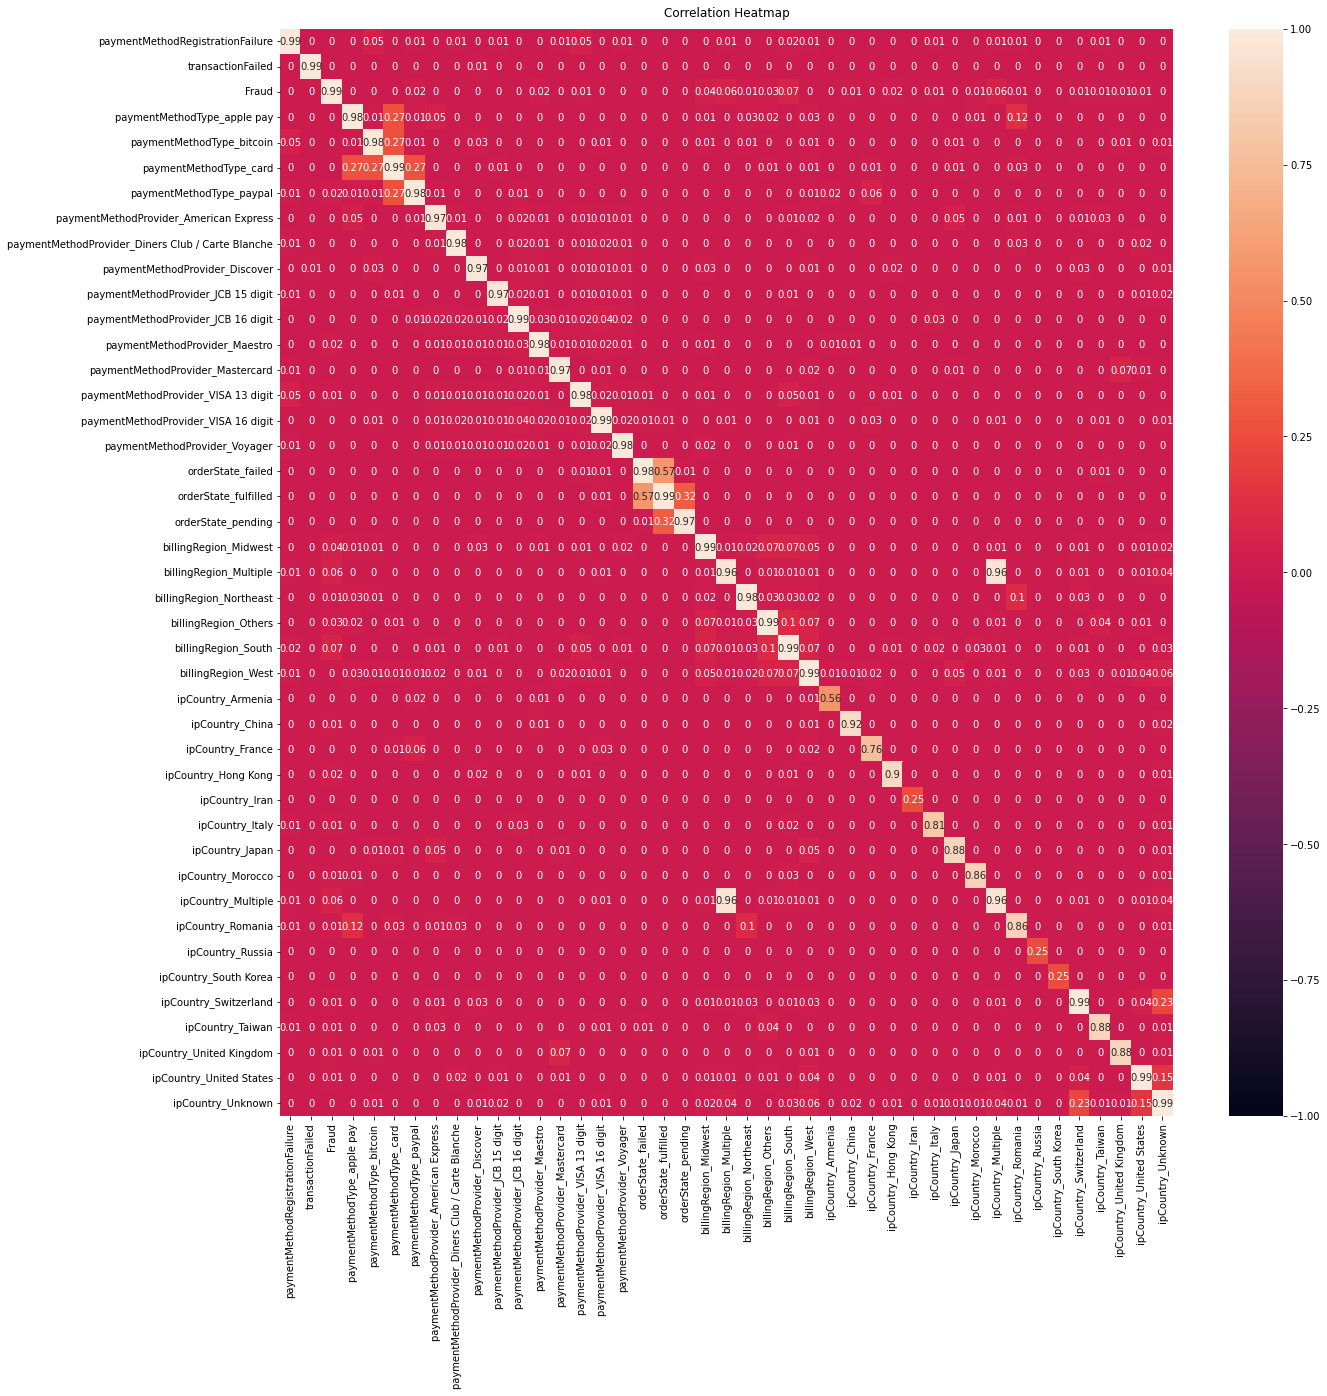

In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(cramer_df, vmin=-1, vmax=1, annot=True, ax = ax).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### Chi-square

In [ ]:
p_values = []
chai_stats = []
for cat1 in categorical_df.columns:
    for cat2 in categorical_df.columns:
            crosstab = pd.crosstab(full_df_encode[cat1], full_df_encode[cat2])
            chai2, p_val, _, _ = stats.chi2_contingency(crosstab)
            p_values.append((cat1, cat2, p_val))
            chai_stats.append((cat1, cat2, chai2))
     
chisquare = pd.DataFrame(p_values, columns=['cat1', 'cat2', 'p-value'])
table = chisquare.pivot_table(index='cat1', columns='cat2', values='p-value')
table

cat2,Fraud,billingRegion_Midwest,billingRegion_Multiple,billingRegion_Northeast,billingRegion_Others,billingRegion_South,billingRegion_West,ipCountry_Armenia,ipCountry_China,ipCountry_France,...,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,paymentMethodRegistrationFailure,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,transactionFailed
cat1,,,,,,,,,,,,,,,,,,,,,
Fraud,8.737592e-129,1.294982e-06,8.065371e-10,3.238941e-02,1.169432e-04,4.233538e-10,6.869882e-01,6.208251e-01,2.339687e-02,2.268027e-01,...,8.234722e-01,7.493215e-02,3.883156e-01,1.618402e-01,7.035228e-01,8.430453e-01,2.620119e-01,2.051673e-01,3.281205e-04,4.330801e-01
billingRegion_Midwest,1.294982e-06,3.290286e-128,2.180329e-02,3.870962e-04,4.395961e-10,3.623632e-10,4.279935e-08,1.000000e+00,5.366029e-01,7.718460e-01,...,5.983725e-01,2.303806e-02,4.599520e-01,3.118553e-04,8.956762e-01,1.792948e-02,1.744586e-02,6.415923e-01,4.730992e-01,1.000000e+00
billingRegion_Multiple,8.065371e-10,2.180329e-02,6.240045e-125,1.467156e-01,4.994345e-03,4.769801e-03,1.499270e-02,1.000000e+00,8.744171e-01,1.000000e+00,...,3.967532e-01,1.705546e-01,8.076480e-03,1.000000e+00,6.615030e-02,2.138884e-01,8.538861e-01,3.039104e-01,5.768140e-01,1.000000e+00
billingRegion_Northeast,3.238941e-02,3.870962e-04,1.467156e-01,3.314245e-127,1.843373e-05,1.675035e-05,1.794644e-04,1.000000e+00,4.702210e-01,1.000000e+00,...,1.000000e+00,1.000000e+00,8.874875e-01,3.192798e-01,4.290167e-01,4.579890e-05,3.686431e-02,3.774939e-01,9.347297e-01,3.712826e-01
billingRegion_Others,1.169432e-04,4.395961e-10,4.994345e-03,1.843373e-05,1.763233e-128,5.892622e-14,5.005165e-11,1.000000e+00,8.699354e-02,5.930071e-01,...,9.179080e-02,1.000000e+00,1.939165e-01,9.139202e-01,7.529685e-01,5.304048e-04,9.174451e-01,5.158844e-03,2.974226e-01,9.882996e-01
billingRegion_South,4.233538e-10,3.623632e-10,4.769801e-03,1.675035e-05,5.892622e-14,1.739839e-128,4.043760e-11,1.000000e+00,1.185735e-01,5.883807e-01,...,9.815058e-01,1.061064e-07,4.416138e-01,7.863199e-02,2.185993e-03,1.000000e+00,4.313573e-01,1.000000e+00,4.741867e-01,3.801897e-01
billingRegion_West,6.869882e-01,4.279935e-08,1.499270e-02,1.794644e-04,5.005165e-11,4.043760e-11,2.682395e-128,4.796611e-02,3.689991e-02,5.954543e-04,...,2.806228e-03,1.250315e-02,4.987550e-02,7.636415e-01,7.141595e-03,8.025155e-05,2.873732e-02,1.873345e-02,5.310400e-02,7.779742e-01
ipCountry_Armenia,6.208251e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.796611e-02,1.275751e-73,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.280451e-02,5.510074e-04,9.509687e-01
ipCountry_China,2.339687e-02,5.366029e-01,8.744171e-01,4.702210e-01,8.699354e-02,1.185735e-01,3.689991e-02,1.000000e+00,7.919939e-120,1.000000e+00,...,8.150387e-01,5.096580e-01,1.000000e+00,4.609038e-01,5.232424e-01,5.761814e-01,1.000000e+00,8.160456e-01,1.413380e-01,7.336210e-01


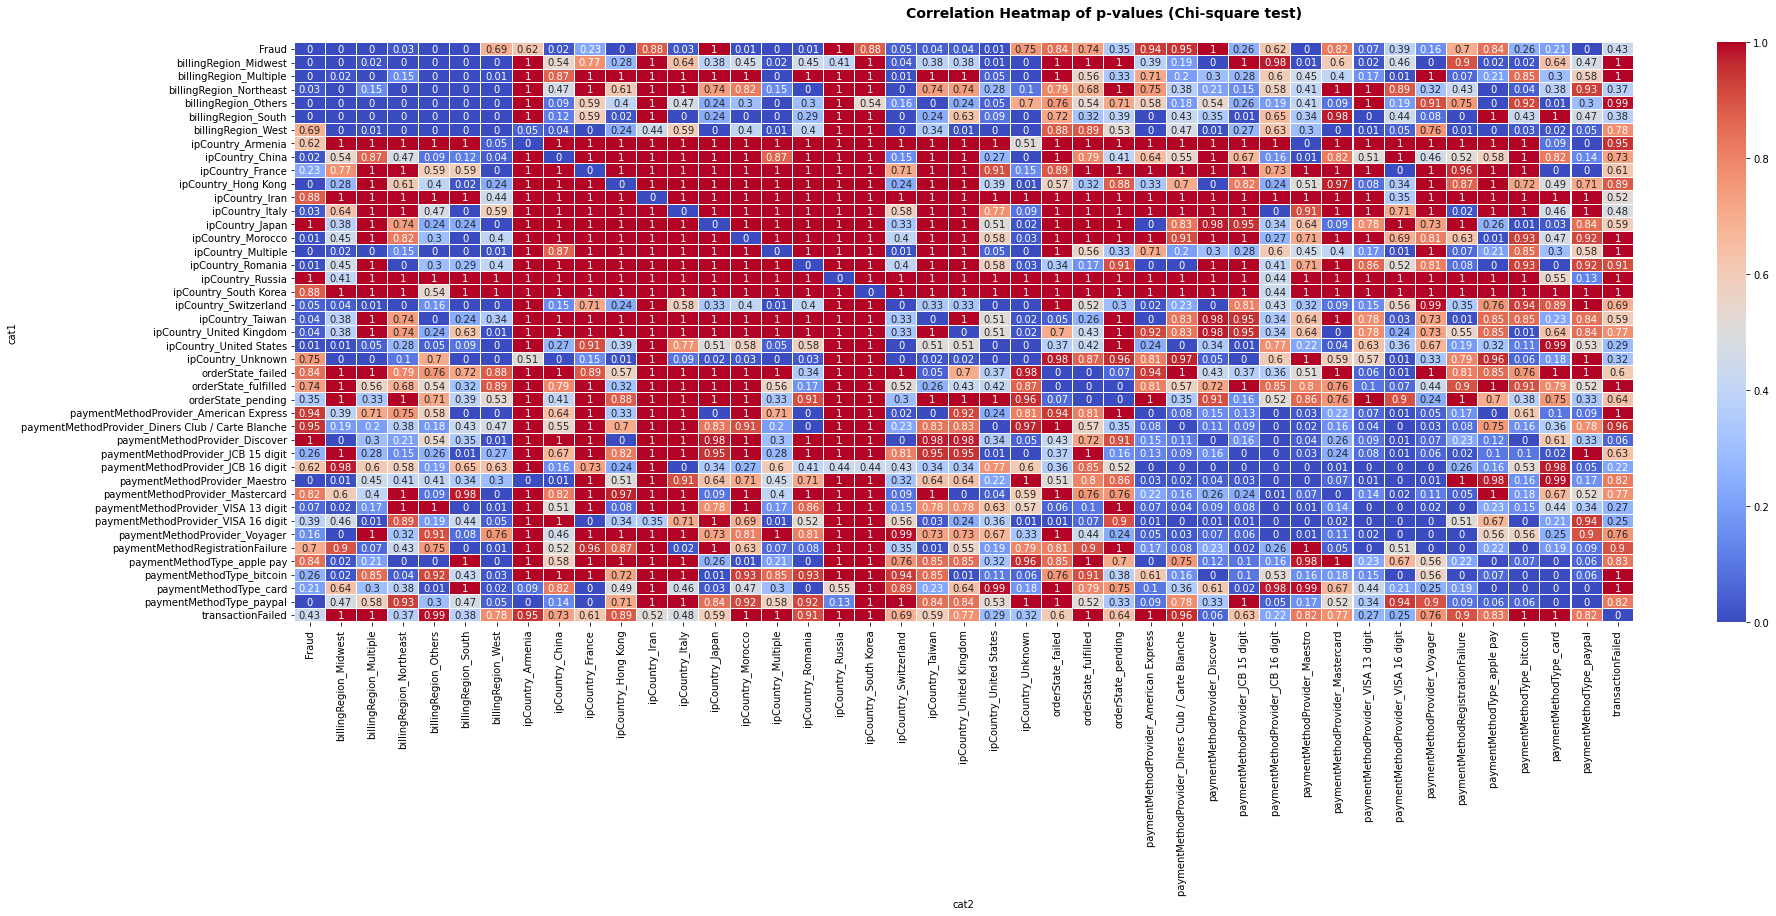

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30,10))

hm = sns.heatmap(round(chisquare.pivot_table(index='cat1', columns='cat2', values='p-value'),2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to "equal" so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap of p-values (Chi-square test)', fontsize=14, fontweight='bold')

Fraud is dependent on variables with p-values less than 0.05.
Looking at the Fraud row, 
All billing region, except billign region west, have p-value less than 0.05.
For ip country, such as Canada, Hong Kong, Multiple, Morocco, South Korea have p-value less than 0.05.
All order state has p-value greater than 0.05.
As for payment method provider, only Maestro and paypal have p-values less than 0.05.
TransactionFailed has p-value greater than 0.05.


### Anova

In [ ]:
results = []

for cat in categorical_df.columns:
    for num in numerical_df.columns:
        
        candidates = []
        for val in full_df_encode[cat].unique():
            if len(full_df_encode[full_df_encode[cat]==val][num])>0:
                candidates.append(full_df_encode[full_df_encode[cat]==val][num])
                
        _, p_val = stats.f_oneway(*candidates)
        results.append((cat, num, p_val))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3650: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [ ]:
Anova = pd.DataFrame(results, columns=['Categorical', 'Numerical', 'P-value'])
anova_results = Anova.pivot_table(index='Numerical', columns='Categorical')
anova_results

P-value                                               \
Categorical               Fraud billingRegion_Midwest billingRegion_Multiple   
Numerical                                                                      
No_Accounts        1.205302e-10              0.010861           0.000000e+00   
No_Orders          2.169545e-23              0.000201          4.909867e-250   
No_Payments        7.875839e-28              0.031161           9.878661e-77   
No_Transactions    8.349800e-18              0.000046          1.224780e-196   
transactionAmount  1.010418e-15              0.012001           6.164426e-01   

                                                                \
Categorical       billingRegion_Northeast billingRegion_Others   
Numerical                                                        
No_Accounts                      0.075593             0.002365   
No_Orders                        0.033432             0.000186   
No_Payments                      0.006234             0.000638   
No_Transactions                  0.002626             0.019103   
transactionAmount                0.872024             0.169437   

                                                                            \
Categorical       billingRegion_South billingRegion_West ipCountry_Armenia   
Numerical                                                                    
No_Accounts                  0.002254           0.007384          0.751707   
No_Orders                    0.496928           0.032145          0.181407   
No_Payments                  0.934171           0.327805          0.328014   
No_Transactions              0.900766           0.006913          0.216755   
transactionAmount            0.019536           0.314422          0.272789   

                                                    ...  \
Categorical       ipCountry_China ipCountry_France  ...   
Numerical                                           ...   
No_Accounts              0.415344         0.653989  ...   
No_Orders                0.171032         0.614440  ...   
No_Payments              0.111033         0.165681  ...   
No_Transactions          0.060039         0.314753  ...   
transactionAmount        0.062886         0.882972  ...   

                                                    \
Categorical       paymentMethodProvider_Mastercard   
Numerical                                            
No_Accounts                               0.201061   
No_Orders                                 0.090412   
No_Payments                               0.364539   
No_Transactions                           0.134141   
transactionAmount                         0.806116   

                                                       \
Categorical       paymentMethodProvider_VISA 13 digit   
Numerical                                               
No_Accounts                                  0.087866   
No_Orders                                    0.673342   
No_Payments                                  0.797637   
No_Transactions                              0.525210   
transactionAmount                            0.169720   

                                                       \
Categorical       paymentMethodProvider_VISA 16 digit   
Numerical                                               
No_Accounts                                  0.003531   
No_Orders                                    0.024199   
No_Payments                                  0.388985   
No_Transactions                              0.336897   
transactionAmount                            0.094638   

                                                 \
Categorical       paymentMethodProvider_Voyager   
Numerical                                         
No_Accounts                            0.879862   
No_Orders                              0.819926   
No_Payments                            0.850542   
No_Transactions                        0.613380   
transactionAmount                      0.182168   



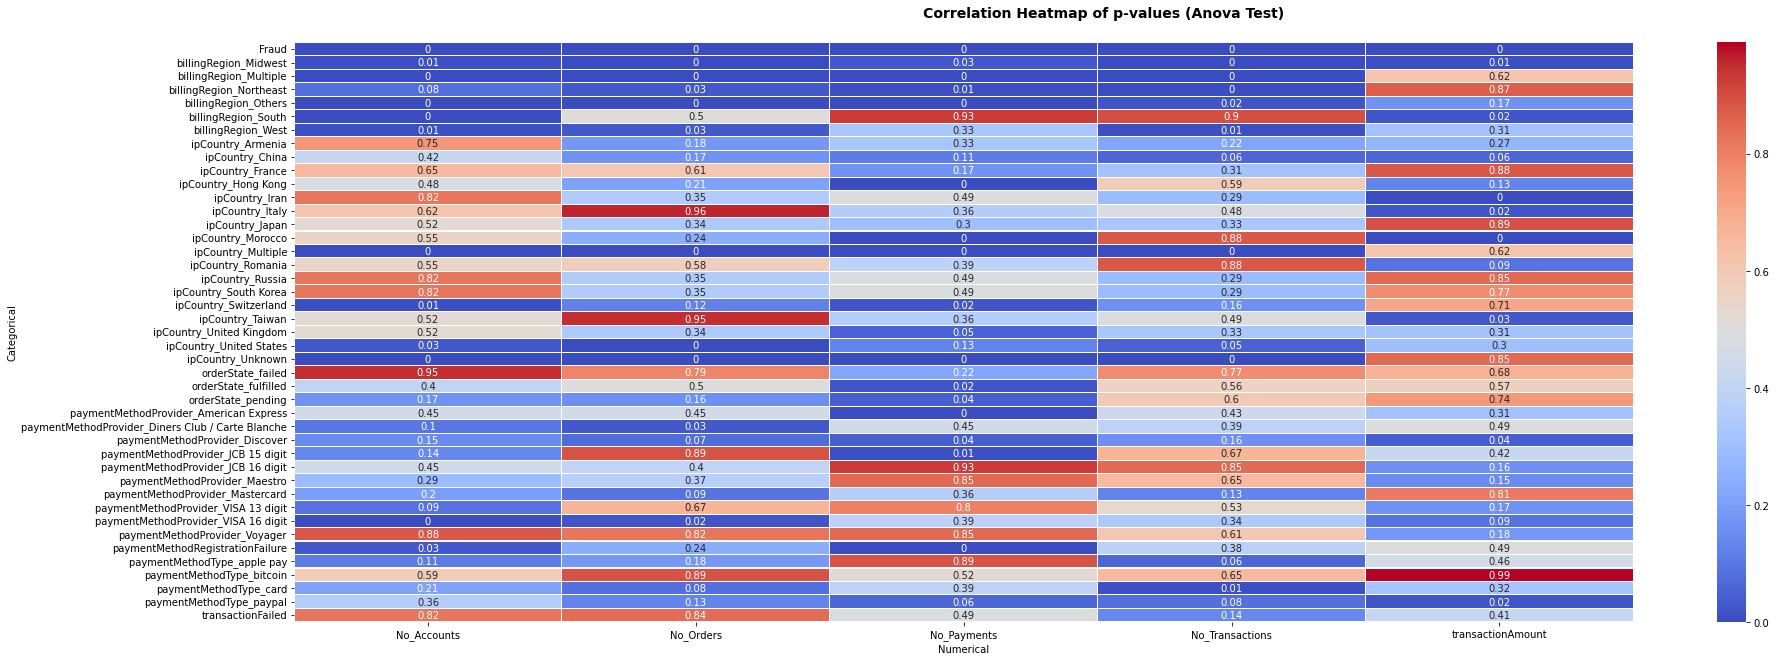

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30,10))

hm = sns.heatmap(round(Anova.pivot_table(index='Categorical', columns='Numerical', values='P-value'),2), 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to "equal" so each cell will be square-shaped.
                 annot=True, 
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap of p-values (Anova Test)', fontsize=14, fontweight='bold')

Looking at the Fraud row, all of the variables have a p-value (Anova) of smaller than 0.05 which means that Fraud is dependent on most of the variables 

### Pearson Correlation

In [ ]:
y = full_df_encode['Fraud']
X = full_df_encode.drop(['Fraud'], axis = 1)

## Correlation between numerical input and categorical output 
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X[numerical_df.columns], y, 2)

print(str(len(cor_feature)), 'selected features')
print(*cor_feature, sep = ", ") 

2 selected features
No_Orders, No_Payments


Chooses top 2 numerical variables. But not very useful since we only have a few numerical variables in the first place.

# Split into train, test

In [ ]:
full_df

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,customerBillingAddressRegion,ip_country,No_Accounts,Fraud
0,1,card,JCB 16 digit,18,0,pending,2,2,1,West,China,1,False
1,1,card,JCB 16 digit,26,0,fulfilled,2,2,1,West,China,1,False
2,0,bitcoin,American Express,45,0,fulfilled,3,3,7,West,Japan,1,True
3,0,bitcoin,American Express,23,0,fulfilled,3,3,7,West,Japan,1,True
4,1,bitcoin,VISA 16 digit,43,1,fulfilled,3,3,7,West,Japan,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0,card,VISA 13 digit,25,1,fulfilled,7,5,4,Midwest,Unknown,1,False
619,0,card,VISA 13 digit,25,0,fulfilled,7,5,4,Midwest,Unknown,1,False
620,0,paypal,JCB 15 digit,25,1,fulfilled,7,5,4,Midwest,Unknown,1,False
621,0,paypal,JCB 15 digit,19,0,fulfilled,7,5,4,Midwest,Unknown,1,False


In [ ]:
y = full_df['Fraud']
X = full_df.drop(['Fraud'], axis = 1)
cols = X.columns
index = X.index

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=1)

In [ ]:
X_train

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,customerBillingAddressRegion,ip_country,No_Accounts
454,0,card,JCB 16 digit,50,0,fulfilled,8,6,6,West,Unknown,1
477,0,paypal,JCB 16 digit,24,0,fulfilled,5,4,2,Midwest,Unknown,1
334,0,paypal,VISA 16 digit,16,0,fulfilled,4,4,1,West,France,1
322,0,card,Voyager,15,0,failed,4,3,2,Midwest,Unknown,1
365,0,card,JCB 15 digit,74,0,fulfilled,10,8,5,South,Switzerland,1
...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,card,VISA 16 digit,48,0,failed,5,3,2,Northeast,United States,1
148,0,card,Maestro,46,0,fulfilled,6,5,2,South,China,1
74,0,card,Mastercard,43,0,fulfilled,4,2,1,Midwest,United States,1
249,0,card,Voyager,31,0,fulfilled,5,3,2,South,Switzerland,1


In [ ]:
y_train

454     True
477    False
334    False
322    False
365     True
       ...  
133    False
148    False
74     False
249     True
37      True
Name: Fraud, Length: 469, dtype: bool

In [ ]:
X_test

,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,customerBillingAddressRegion,ip_country,No_Accounts
615,0,card,Voyager,40,0,fulfilled,8,6,6,Midwest,Unknown,1
299,0,card,Voyager,27,0,fulfilled,5,4,3,Northeast,Switzerland,1
23,0,card,VISA 16 digit,65,0,fulfilled,28,23,11,Multiple,Multiple,8
522,0,card,Diners Club / Carte Blanche,40,1,fulfilled,15,3,1,Others,United States,1
583,0,card,Mastercard,15,0,failed,5,4,2,West,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
603,0,card,Voyager,43,0,fulfilled,6,5,3,West,Unknown,1
34,0,card,VISA 16 digit,42,0,fulfilled,28,23,11,Multiple,Multiple,8
69,0,bitcoin,VISA 16 digit,10,0,fulfilled,4,4,3,Midwest,Switzerland,1
39,0,card,JCB 16 digit,40,0,fulfilled,28,23,11,Multiple,Multiple,8


In [ ]:
y_test

615     True
299    False
23      True
522    False
583    False
       ...  
603     True
34      True
69     False
39      True
207    False
Name: Fraud, Length: 118, dtype: bool

In [ ]:
y_train.value_counts()

False    278
True     191
Name: Fraud, dtype: int64

In [ ]:
y_test.value_counts()

False    61
True     57
Name: Fraud, dtype: int64

# Process Data - Encoding, Scaling

## Label encoding on fraud

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
print(f'fraud: {le.classes_}')
y_train = le.transform(y_train)
y_test = le.transform(y_test)

fraud: [False  True]


In [ ]:
y_train

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,

## One hot encoding on categorical variables

In [ ]:
#payment method encoding
ohe = preprocessing.OneHotEncoder()
encoded_payment =ohe.fit_transform(X_train["paymentMethodType"].values.reshape(-1,1))
col_names = list(map(lambda x: x.replace("x0", "paymentMethodType"), list(ohe.get_feature_names_out())))
payment_train = pd.DataFrame(encoded_payment.toarray(), columns=col_names)
X_train.reset_index(inplace=True)
X_train = X_train.join(payment_train)
X_train.drop([ "index", "paymentMethodType"], axis = 1, inplace=True)

payment_test = pd.DataFrame(ohe.transform(X_test["paymentMethodType"].values.reshape(-1,1)).toarray(), columns=col_names)
X_test.reset_index(inplace=True)
X_test = X_test.join(payment_test)
X_test.drop(["index", "paymentMethodType"], axis = 1, inplace=True)


In [ ]:
X_test

,paymentMethodRegistrationFailure,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,customerBillingAddressRegion,ip_country,No_Accounts,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal
0,0,Voyager,40,0,fulfilled,8,6,6,Midwest,Unknown,1,0.0,0.0,1.0,0.0
1,0,Voyager,27,0,fulfilled,5,4,3,Northeast,Switzerland,1,0.0,0.0,1.0,0.0
2,0,VISA 16 digit,65,0,fulfilled,28,23,11,Multiple,Multiple,8,0.0,0.0,1.0,0.0
3,0,Diners Club / Carte Blanche,40,1,fulfilled,15,3,1,Others,United States,1,0.0,0.0,1.0,0.0
4,0,Mastercard,15,0,failed,5,4,2,West,Unknown,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,Voyager,43,0,fulfilled,6,5,3,West,Unknown,1,0.0,0.0,1.0,0.0
114,0,VISA 16 digit,42,0,fulfilled,28,23,11,Multiple,Multiple,8,0.0,0.0,1.0,0.0
115,0,VISA 16 digit,10,0,fulfilled,4,4,3,Midwest,Switzerland,1,0.0,1.0,0.0,0.0
116,0,JCB 16 digit,40,0,fulfilled,28,23,11,Multiple,Multiple,8,0.0,0.0,1.0,0.0


In [ ]:
# others ohe encoding
# paymentMethodProvider
ohe = preprocessing.OneHotEncoder()
encoded_payment =ohe.fit_transform(X_train["paymentMethodProvider"].values.reshape(-1,1))
col_names = list(map(lambda x: x.replace("x0", "paymentMethodProvider"), list(ohe.get_feature_names_out())))
payment_train = pd.DataFrame(encoded_payment.toarray(), columns=col_names)
X_train = X_train.join(payment_train)

payment_test = pd.DataFrame(ohe.transform(X_test["paymentMethodProvider"].values.reshape(-1,1)).toarray(), columns=col_names)
X_test = X_test.join(payment_test)
# orderState
ohe = preprocessing.OneHotEncoder()
encoded_order =ohe.fit_transform(X_train["orderState"].values.reshape(-1,1))
col_names = list(map(lambda x: x.replace("x0", "orderState"), list(ohe.get_feature_names_out())))
order_train = pd.DataFrame(encoded_order.toarray(), columns=col_names)
X_train = X_train.join(order_train)

order_test = pd.DataFrame(ohe.transform(X_test["orderState"].values.reshape(-1,1)).toarray(), columns=col_names)
X_test = X_test.join(order_test)

# customerBillingAddressRegion
ohe = preprocessing.OneHotEncoder()
encoded_billing =ohe.fit_transform(X_train["customerBillingAddressRegion"].values.reshape(-1,1))
col_names = list(map(lambda x: x.replace("x0", "customerBillingAddressRegion"), list(ohe.get_feature_names_out())))
billing_train = pd.DataFrame(encoded_billing.toarray(), columns=col_names)
X_train = X_train.join(billing_train)

billing_test = pd.DataFrame(ohe.transform(X_test["customerBillingAddressRegion"].values.reshape(-1,1)).toarray(), columns=col_names)
X_test = X_test.join(billing_test)


# ip_country
ohe = preprocessing.OneHotEncoder()
encoded_ip =ohe.fit_transform(X_train["ip_country"].values.reshape(-1,1))
col_names = list(map(lambda x: x.replace("x0", "ipCountry"), list(ohe.get_feature_names_out())))
ip_train = pd.DataFrame(encoded_ip.toarray(), columns=col_names)
X_train = X_train.join(ip_train)

ip_test = pd.DataFrame(ohe.transform(X_test["ip_country"].values.reshape(-1,1)).toarray(), columns=col_names)
X_test = X_test.join(ip_test)



In [ ]:
X_train.columns

Index(['paymentMethodRegistrationFailure', 'paymentMethodProvider',
       'transactionAmount', 'transactionFailed', 'orderState',
       'No_Transactions', 'No_Orders', 'No_Payments',
       'customerBillingAddressRegion', 'ip_country', 'No_Accounts',
       'paymentMethodType_apple pay', 'paymentMethodType_bitcoin',
       'paymentMethodType_card', 'paymentMethodType_paypal',
       'paymentMethodProvider_American Express',
       'paymentMethodProvider_Diners Club / Carte Blanche',
       'paymentMethodProvider_Discover', 'paymentMethodProvider_JCB 15 digit',
       'paymentMethodProvider_JCB 16 digit', 'paymentMethodProvider_Maestro',
       'paymentMethodProvider_Mastercard',
       'paymentMethodProvider_VISA 13 digit',
       'paymentMethodProvider_VISA 16 digit', 'paymentMethodProvider_Voyager',
       'orderState_failed', 'orderState_fulfilled', 'orderState_pending',
       'customerBillingAddressRegion_Midwest',
       'customerBillingAddressRegion_Multiple',
       'customer

In [ ]:
X_train.drop(["paymentMethodProvider", "orderState", "customerBillingAddressRegion", "ip_country"], axis = 1, inplace =True)
X_test.drop(["paymentMethodProvider", "orderState", "customerBillingAddressRegion", "ip_country"], axis = 1, inplace =True)

X_train

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,No_Accounts,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,...,ipCountry_Morocco,ipCountry_Multiple,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown
0,0,50,0,8,6,6,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,24,0,5,4,2,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,16,0,4,4,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,15,0,4,3,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,74,0,10,8,5,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0,48,0,5,3,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
465,0,46,0,6,5,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,0,43,0,4,2,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
467,0,31,0,5,3,2,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.shape

(469, 47)

In [ ]:
X_test.shape

(118, 47)

## Log Scaling
Log scaling is used on skewed data

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.


In [ ]:
continuous_var = ["transactionAmount", "No_Transactions", "No_Orders", "No_Payments", "No_Accounts"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='box-cox')
for col in continuous_var:
  X_train[col] = scaler.fit_transform(X_train[[col]])
  X_test[col] = scaler.transform(X_test[[col]])

In [ ]:
X_train

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,No_Accounts,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,...,ipCountry_Morocco,ipCountry_Multiple,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown
0,0,0.932356,0,0.670533,0.672305,1.411767,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,-0.467713,0,-0.090536,-0.000449,0.141112,-0.205480,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,-1.185160,0,-0.451419,-0.000449,-1.159686,-0.205480,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-1.295872,0,-0.451419,-0.487255,0.141112,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1.737398,0,1.032315,1.140328,1.250301,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,0,0.850889,0,-0.090536,-0.487255,0.141112,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
465,0,0.766419,0,0.204542,0.371709,0.141112,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,0,0.633529,0,-0.451419,-1.187008,-1.159686,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
467,0,0.005229,0,-0.090536,-0.487255,0.141112,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,No_Accounts,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,...,ipCountry_Morocco,ipCountry_Multiple,ipCountry_Romania,ipCountry_Russia,ipCountry_South Korea,ipCountry_Switzerland,ipCountry_Taiwan,ipCountry_United Kingdom,ipCountry_United States,ipCountry_Unknown
0,0,0.492327,0,0.670533,0.672305,1.411767,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,-0.252035,0,-0.090536,-0.000449,0.701246,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,1.466506,0,2.705394,2.794331,1.845678,4.866643,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.492327,1,1.690437,-0.487255,-1.159686,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,-1.295872,0,-0.090536,-0.000449,0.141112,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,0.633529,0,0.204542,0.371709,0.701246,-0.205480,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
114,0,0.587439,0,2.705394,2.794331,1.845678,4.866643,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0,-1.970343,0,-0.451419,-0.000449,0.701246,-0.205480,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
116,0,0.492327,0,2.705394,2.794331,1.845678,4.866643,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train["transactionAmount"].skew()

0.010521415155291574

In [ ]:
X_train["No_Transactions"].skew()

0.0013064754034743885

In [ ]:
X_train["No_Orders"].skew()

-0.022668872004858905

In [ ]:
X_train["No_Payments"].skew()

0.15507483758463128

In [ ]:
X_train["No_Accounts"].skew()

4.676131117072728

# Null Accuracy

In [ ]:
y_test

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
# calculate the percentage of ones
# because y_train only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.4830508474576271

In [ ]:
max(y_test.mean(), 1 - y_test.mean())

0.5169491525423728

A dumb model that always predicts 1 will be correct 51.7% of the time. 

# Export

In [ ]:
X_train.to_csv("/content/drive/MyDrive/BT4012/raw dataset/X_train.csv")
X_test.to_csv("/content/drive/MyDrive/BT4012/raw dataset/X_test.csv")
pd.DataFrame(y_train, columns = ["Fraud"]).to_csv("/content/drive/MyDrive/BT4012/raw dataset/y_train.csv")
pd.DataFrame(y_test, columns = ["Fraud"]).to_csv("/content/drive/MyDrive/BT4012/raw dataset/y_test.csv")
